# 2. The mathematical building blocks of neural networks

In [5]:
import os
import numpy as np
# we need more than the default 75 below
np.set_printoptions(linewidth=150)

import matplotlib as mpl
import matplotlib.pyplot as plt
# matplotlib shenanigans
plt_fontsize = mpl.rcParams["font.size"]

from IPython.core.magic import register_cell_magic

import keras

os.environ["KERAS_BACKEND"] = "pytorch"

@register_cell_magic
def backend(line, cell):
    current, required = os.environ.get("KERAS_BACKEND", ""), line.split()[-1]
    if current == required:
        get_ipython().run_cell(cell)
    else:
        print(
            f"This cell requires the {required} backend. To run it, change KERAS_BACKEND to "
            f"\"{required}\" at the top of the notebook, restart the runtime, and rerun the notebook."
        )

---

# 2.1 A first look at a neural network

## Workflow
1. **Load data**
2. Preprocess data
3. Build model
4. Train
5. Test

### 1 Load data

## MNIST

[MNIST](https://en.wikipedia.org/wiki/MNIST_database) is a set of images of handwritten digits.

The problem is to classify each greyscale image into the correct category, namely '0', '1'..., '9'.

 Truly the **Hello World** of Deep Learning!

There are 60,000 **training** images and 10,000 **test** images.

The MNIST dataset is one of several TensorFlow datasets.

Loading MNIST is painless because it ships with TensorFlow.

But this ease is unusual: normally data has to be retrieved from the internet or from a private source.

In [6]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [7]:
def mnist_peek(rows, cols):
    fig, axs = plt.subplots(rows, cols)
    for i in range(rows):
        for j in range(cols):
            axs[i, j].imshow(train_images[i * cols + j], cmap=plt.cm.binary)

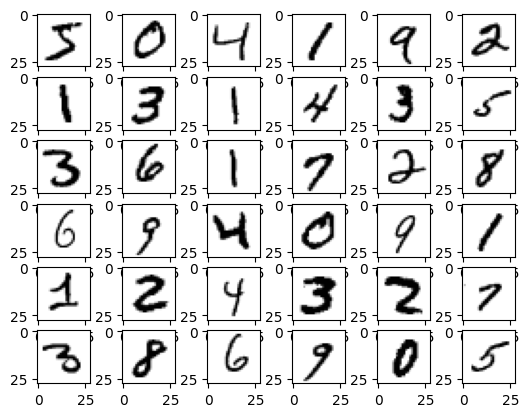

In [8]:
mnist_peek(6, 6)

## Samples, labels and classes


|               |     |        |
|--------------:|:---:|:-------|
|data point     | \|  | sample |
|category       | \|  | class  |
|class of sample| \|  | label  |

 - Each image, or in general, each data point is known as a **sample**.
 - Data points typically belong to one or more categories, called a **class**.
 - Each MNIST image belongs to exactly one category or **class** - '0', '1', '2' etc.
 - The class of a sample is known as its **label**.

## Training and Test Set


```python
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
```

- `train_images` and `train_labels` form the **training set**.
- The model will **learn** from the training set.
- The model will be **tested** on `test_images` and `test_labels`, the test set.

We split our data to try and estimate **how well our model will perform on unseen data**!

## Images and NumPy arrays


The data is stored in special multidimensional arrays – tensors.

Each image is 28 x 28 pixels:

- the training set is a data container with 60000 x 28 x 28 elements;
- the training labels are stored in a 60,000 element vector.

In [9]:
print("tensor:\t\t shape")
print("-"*22)
print("training images:", train_images.shape)
print("training labels:", train_labels.shape)
print("test images:\t", test_images.shape)
print("test labels:\t", test_labels.shape)

tensor:		 shape
----------------------
training images: (60000, 28, 28)
training labels: (60000,)
test images:	 (10000, 28, 28)
test labels:	 (10000,)


## Workflow
1. Load data
2. **Preprocess data**
3. Build model
4. Train
5. Test

### 2. Preprocess data

The data has to be **reshaped** to a form that is acceptable to the model.

The model will expect samples as **vectors (1D arrays)** of floating point values.

In [10]:
print(test_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 198 19

label:  7


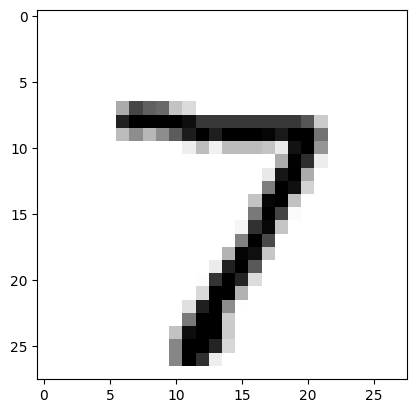

In [11]:
# inspect the first image using the matplotlib graphics library
print('label: ', test_labels[0])
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.show()

In [12]:
# unprocessed data, kept for later
raw_test_images, raw_test_labels = test_images, test_labels

train_images = train_images.reshape((60000, 28 * 28)) # reshape flattens 28 x 28 arrays
test_images = test_images.reshape((10000, 28 * 28))   # to vectors of 784 elements

train_images = train_images.astype('float32') / 255   # cast as floats
test_images = test_images.astype('float32') / 255     # and rescale to [0, 1]

The model is also expecting **categorically encoded labels**.

That means a vector with a **single nonzero element** at the **index** corresponding to the category.

Here, each label will be turned into a 10 element vector with a single (**hot**) nonzero entry.

For example, '7' is encoded as `[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]`.

This is called **one-hot encoding**.

In [13]:
orig_label   = test_labels[0]
train_labels = keras.utils.to_categorical(train_labels) # encode with the nifty `to_categorical` function
test_labels  = keras.utils.to_categorical(test_labels)

# check encoding
print(f"'{orig_label}' as a one-hot vector: {test_labels[0]}")

'7' as a one-hot vector: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Workflow
1. Load data
2. Preprocess data
3. **Build model**
4. Train
5. Test

### 3. Build our model

We create a simple neural model.

It will contain two layers layers (aka **data-processing modules (transformations)**).

Data will move in a single `forward` direction through the model – a `feed-forward` neural model.

<!-- <img style="float:right;height:400px" src="images/tikz12.png" style="float:right">  -->
<img style="float:right;height:400px" src="https://raw.githubusercontent.com/jchwenger/AI/main/lectures/02/images/tikz12.png">

<small style="position:absolute; bottom:0; right:0"><a href="http://neuralnetworksanddeeplearning.com/chap1.html">Michael Nielsen, <em>Neural Networks and Deep Learning</em>, Determination Press, 2015</a>, <a href="https://creativecommons.org/licenses/by-nc/3.0/deed.en_GB">License</a></small>


In [15]:
# an empty model
model = keras.models.Sequential()

# add two layers
model.add(keras.layers.Input((28 * 28, )))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

 - `keras.models.Sequential()` creates the empty net.

 - `model.add()` adds a layer:
   - `layers.Dense` objects. `Dense` means **fully-connected**.  
     Parameters:
     - the number of neurons;  
     - the activation function;
     - the input shape of the data (only for the first layer).
    

- The activation function in the 1<sup>st</sup> layer is the **Rectified Linear (RELU)**  (aka positive part):

$$ relu(x) = \max(0, x)$$

 - The 2<sup>nd</sup> layer is capped with a **softmax**, which outputs a **probability distribution**:
    - numbers are **nonnegative** and **sum to one**;
    - they are the **probabilities of membership of each class**:  
      the probability that the sample is labeled '0' or '1', etc.

### Visualising the ReLU

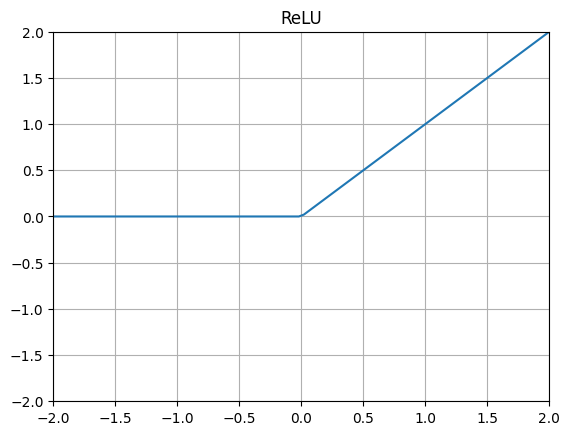

In [17]:
data = np.linspace(-2, 2, 100) # one hundred numbers
plt.plot(data, keras.layers.ReLU()(data))
plt.title("ReLU")
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.grid()
plt.show()

### Visualising the softmax

The probabilities sum to: 1.0! (o˘◡˘o)


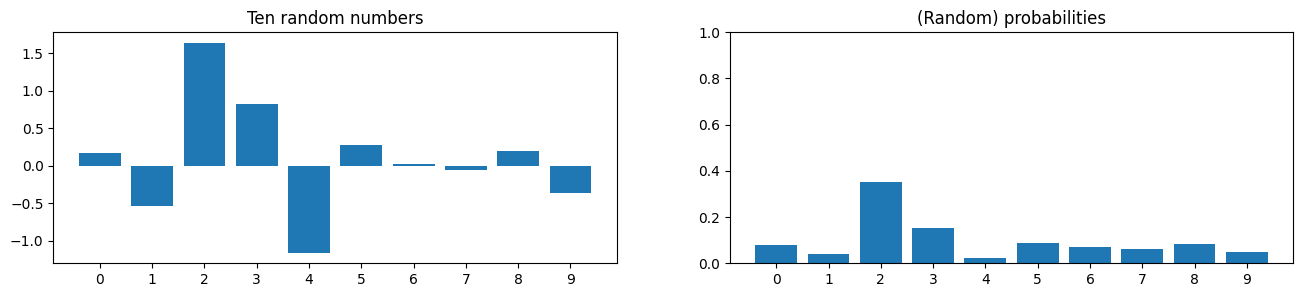

In [23]:
# ten random numbers
nums = np.random.normal(size=(10,))
# turned into probabilities
probs = keras.layers.Softmax()(nums)

print(f"The probabilities sum to: {keras.ops.sum(probs).numpy()}! (o˘◡˘o)")

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(16,3))
# our ten numbers
ax1.bar([str(x) for x in range(nums.shape[0])], nums)
ax1.set_title("Ten random numbers")
# plot the probabilities
ax2.bar([str(x) for x in range(probs.shape[0])], probs)
ax2.set_title("(Random) probabilities")
ax2.set_ylim([0,1])
plt.show()

The model is not yet ready.

We must specify:

- a **loss** function;

- an **optimiser**;

- one or more training **metrics**.

The optimiser makes **parameter adjustments** in the training loop, and **reports progress** on our metrics.

In [24]:
# loss, optimiser and metrics are chosen at compilation
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

`categorical_crossentropy` is the preferred loss for **single label multiclass problems**.

`rmsprop` is one of several `tensorflow.keras` **optimizers**.  
The update depends on input data (a *mini-batch*, a subset of our dataset) and the loss function.

We monitor `accuracy`, the fraction of correctly classified samples: `correct_predictions/total`.

### Cross-entropy

The loss function `categorical_crossentropy` quantifies **how far off** the model prediction is from the target.

We are actually looking at **how different** two probability distributions are.

The **label vector** has all the probability mass on one value (the correct label).

### Softmax vs one-hot ground truth

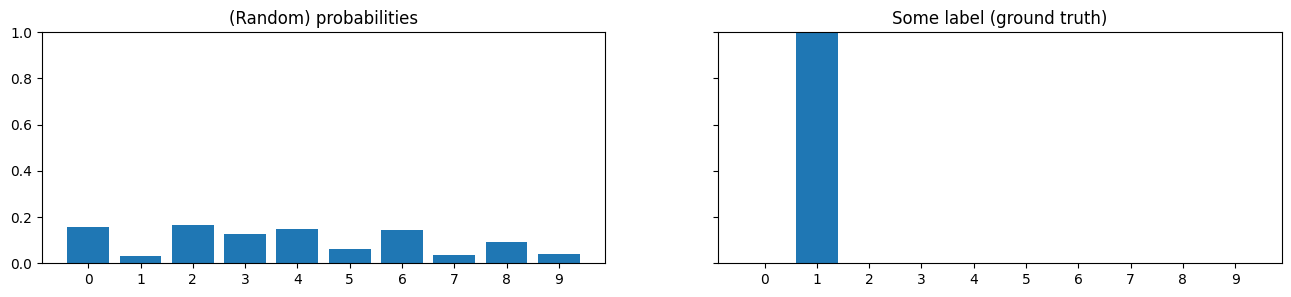

In [25]:
# ten random numbers
nums = np.random.normal(size=(10,))
# turned into probabilities
probs = keras.layers.Softmax()(nums)

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(16,3))
# plot the probabilities
ax1.bar([str(x) for x in range(probs.shape[0])], probs)
ax1.set_title("(Random) probabilities")
ax1.set_ylim([0,1])
# plot an imaginary label
ax2.bar([str(x) for x in range(probs.shape[0])], [0,1,0,0,0,0,0,0,0,0])
ax2.set_title("Some label (ground truth)")
ax2.set_ylim([0,1])
plt.show()

### Cross-entropy

$$
\bbox[5px,border:2px solid red]
{
H(p, q) = - \Sigma_{x \in \text{classes} } \overbrace{ p(x) }^{\color{blue} \text{true distribution} } \log \underbrace{ q(x) }_{ \color{green} \text{model prediction} }
}
$$

<small>[What is cross-entropy, Stack Overflow](https://stackoverflow.com/a/41990932)</small>

What does this mean for us? For **all** categories except the right one, the terms of this sum will be zero.

Since `true_class` is 1, we are left only with:

$$
\bbox[5px,border:2px solid red]
{
- p(\text{true class})\ log{(\text{prediction})} \to - log{(\text{prediction})}
}
$$

Sure, but what does **that** mean for us?

In [30]:
def plot_minus_log(figsize=(10,8)):
    points = np.linspace(.001, 1, 100) # a hundred points between .001 and 1
    mpl.rcParams.update({'font.size': plt_fontsize * 1.5})
    f = plt.figure(figsize=figsize)
    plt.xlim([-.1,1.1])
    plt.plot(points, - np.log(points), label="- log(x)")
    plt.text(0.05, 6, "← we are very WRONG: prediction")
    plt.text(0.05, 5.5, "is almost 0 but the truth is 1...")
    plt.text(0.05, 5, "BIG loss!")
    plt.text(.52, 1.5, "we are super RIGHT: prediction")
    plt.text(.52, 1, "is almost 1 and the truth is 1...")
    plt.text(.8, .5, "SMALL loss ↓")
    plt.xlabel("Prediction: from 0 to 1")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    mpl.rcParams.update({'font.size': plt_fontsize})

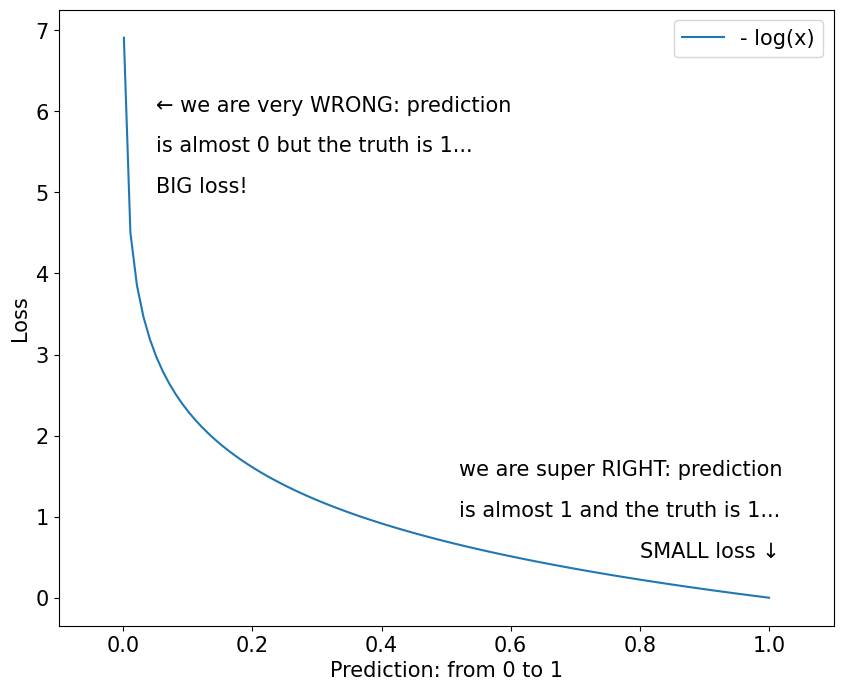

In [31]:
plot_minus_log()

## Workflow
1. Load data
2. Preprocess data
3. Build model
4. **Train**
5. Test

### Before we train: what's our starting point?

- Let's see what our model can do without any training.

- We `evaluate` it on the test set, as we will do later.

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print()
print('test_acc:', test_acc)
print('1 would have been perfect...ground breaking! o(〒﹏〒)o')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.0989 - loss: 2.3615

test_acc: 0.09889999777078629
1 would have been perfect...ground breaking! o(〒﹏〒)o


### 4. Train

- All set to train!The model is *fitted* to its training data (= **training**): `model.fit()`.

- Two quantities will be displayed during training:
    - the **loss** of the model over the training data;
    - the **accuracy** of the model over the training data.

- An **epoch** is a complete pass over the training set.

- Each pass is split into **mini-batches** (number of sample processed in one go, we will see why).

The optimiser – `rmsprop`– tweaks layer parameters (weights and biases).

The parameters are adjusted in an attempt to **lower the loss** – the discrepancy between prediction and target.

<!-- <img src="images/chollet/figure1.9.png" style="height: 400px;"> -->
<img style="height: 400px;" src="https://raw.githubusercontent.com/jchwenger/AI/main/lectures/02/images/chollet/figure1.9.png">

<small>[DLWP](https://deeplearningwithpython.io/chapters/chapter01_what-is-deep-learning/), Chapter 1, Figure 1.9</small>

`model.fit()` has several arguments:

 - the training samples;
 - the labels;
 - `epochs` and `batch_size` settings.


Watch for the monitoring information printed at the end of each epoch:
- the loss is (should be) decreasing;
- the accuracy is (should be) increasing;

In [34]:
# training - fit to input data
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9237 - loss: 0.2642
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9681 - loss: 0.1071
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9791 - loss: 0.0701
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9847 - loss: 0.0512
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9885 - loss: 0.0384


After training, we see that the model correctly recognises almost 99% of the images.

But, for reasons that we will discuss at length later on, this does not mean that the model performs with 99% accuracy on **unseen data**.

That is why we need to test it (again).

## Workflow
1. Load data
2. Build model
3. Preprocess data
4. Train
5. **Test**

### 5. Test the model on unseen data.

`model.evaluate()` runs the test image data, sample by sample, through the model in a forward pass, and prints the overall loss and accuracy.

In [35]:
# evaluate on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

print()
print('test_acc:', test_acc)
print('Yay! ٩(◕‿◕｡)۶')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.9815 - loss: 0.0606

test_acc: 0.9815000295639038
Yay! ٩(◕‿◕｡)۶


## Evaluation

- Test set accuracy is lower than the training set accuracy.

- This is to be expected!

- This gap between *training accuracy* and *test accuracy* will become very important when we talk about **overfitting**.

- Machine learning models, like humans?, tend to perform **worse on new data** than on their training data.

- Intuitively, what happens is that the model *overadapts* to the training data, creating a representation that is really inapplicable to new data.

In [36]:
# the program so far: less than 20 lines of code!

# 1. LOAD
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# 2. PREPROCESS
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

# 3. BUILD
model = keras.models.Sequential()
model.add(keras.layers.Input((28 * 28, )))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

# 4. TRAIN
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9256 - loss: 0.2618
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9681 - loss: 0.1060
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9793 - loss: 0.0695
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9848 - loss: 0.0502
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9886 - loss: 0.0381


### Use our model

We can see the softmax output for a single sample by calling `model.predict()`.

In [37]:
# note the syntax: test_images[:1] keeps the batch dimension!
preds = model.predict(test_images[:1], verbose=0)
argm = np.argmax(preds[0])
for i, x in enumerate(preds[0]):
    if i == argm:
        print(f"\033[1mclass: {i:2} with probability: {x:.15f}\033[0m")
    else:
        print(f"class: {i:2} with probability: {x:.15f}")

class:  0 with probability: 0.000000023169811
class:  1 with probability: 0.000000010816517
class:  2 with probability: 0.000007975900189
class:  3 with probability: 0.000002697109721
class:  4 with probability: 0.000000000074794
class:  5 with probability: 0.000000012587360
class:  6 with probability: 0.000000000026522
class:  7 with probability: 0.999986767768860
class:  8 with probability: 0.000000063051793
class:  9 with probability: 0.000002370491075


##### Note

- `model.evaluate()` will run evaluation loss and metrics as defined in the `compile` step;
- `model.predict()` will simply run the model on one or several samples and return predictions.

### Visualising a prediction

If we plot this, the probabilities assigned to the other classes are so small they don't even appear!

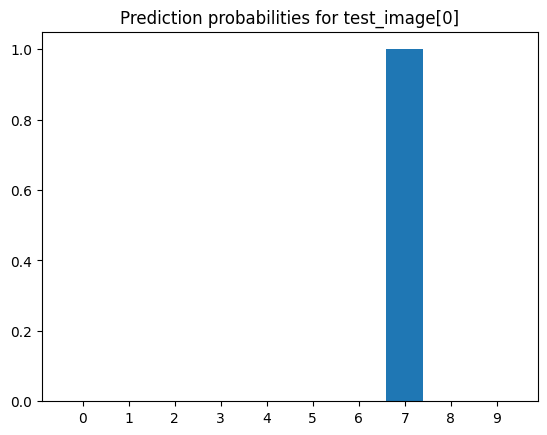

In [38]:
fig, ax = plt.subplots()
# preds.shape: (1, 10)
ax.bar([str(x) for x in range(10)], preds[0])
plt.title("Prediction probabilities for test_image[0]")
plt.show()

We can extract the *index* of the highest probability (= our class) using `np.argmax`.

In [39]:
# what is the most probable class?
# the index of the largest element of the output vector
print(np.argmax(preds[0]))

7


In [40]:
print(f"compare: {test_images[:1].shape} and {test_images[0].shape}")

compare: (1, 784) and (784,)


In [41]:
# does the prediction agree with the label?
print(raw_test_labels[0])

7


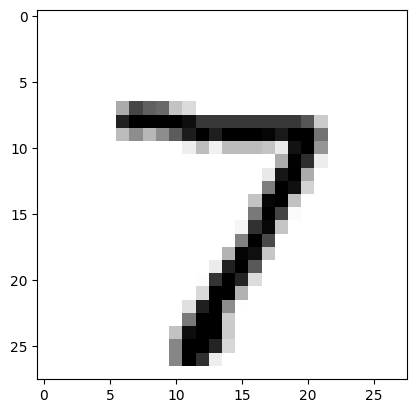

In [42]:
plt.imshow(raw_test_images[0], cmap=plt.cm.binary) # it's a seven!
plt.show()

Our model got that one right!

Remember that the model does not have eyes and a visual cortex.

The model only mapped a 784 element vector to a ten component probability vector.

We supply the meaning.

## The Training Loop

0. **Initialize** the weight and bias tensors with small random values.
1. Draw a **mini-batch** of training samples `x` and corresponding labels `y`.
2. **Forward pass**/**Inference**: the model makes a prediction `y_pred`.
3. **Loss**: Calculate how much `y_pred` differs from `y`.
4. **Backward pass**: using the gradient of the parameters with respect to the loss, update all parameters to lower the loss on this mini-batch.
5. Exit or return to 1.

Our goal is to use this tool to build and train neural networks for a variety of different tasks, and how to address the discrepancy between prediction on training and unseen data.

But before we do these things, we have to digress into tensor maths and learn how the optimiser does its job so wonderfully.

### Note

We are diving into the belly of the beast. This *by far* the mathiest lecture of the term!

And, as much as all this becomes increasingly important as you get deeper into this field, you will find most of what we see today fairly disconnected from our labs for instance!